<a href="https://colab.research.google.com/github/amita-kapoor/FaceRecognition/blob/master/Source/HNN/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Face recogntion using eigenfaces
#LBPH_dafault_values
#https://docs.opencv.org/3.4/da/d60/tutorial_face_main.html

In [2]:
#!pip install tf-nightly

In [3]:
# https://drive.google.com/file/d/1fjBB65hrc7iJN4hv8_djFtWGtwOxAaKz/view?usp=sharing

In [4]:
!gdown --id 1fjBB65hrc7iJN4hv8_djFtWGtwOxAaKz

Downloading...
From: https://drive.google.com/uc?id=1fjBB65hrc7iJN4hv8_djFtWGtwOxAaKz
To: /content/faceImages2.zip
64.8MB [00:00, 115MB/s]


In [5]:
!mkdir "faceImages"

mkdir: cannot create directory ‘faceImages’: File exists


In [6]:
type('faceImages2.zip')

str

In [7]:
!unzip "/content/faceImages2.zip" -d "/content/faceImages/"

Archive:  /content/faceImages2.zip
replace /content/faceImages/faceImages2/data/001.Ankit/Ankit_0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/faceImages/faceImages2/data/001.Ankit/Ankit_0001.jpg  
  inflating: /content/faceImages/faceImages2/data/001.Ankit/Ankit_0002.jpg  
  inflating: /content/faceImages/faceImages2/data/001.Ankit/Ankit_0004.jpg  
  inflating: /content/faceImages/faceImages2/data/001.Ankit/Ankit_0005.jpg  
  inflating: /content/faceImages/faceImages2/data/001.Ankit/Ankit_0006.jpg  
  inflating: /content/faceImages/faceImages2/data/001.Ankit/Ankit_0007.jpg  
  inflating: /content/faceImages/faceImages2/data/002.Anshul/Anshul_0001.jpg  
  inflating: /content/faceImages/faceImages2/data/002.Anshul/Anshul_0002.jpg  
  inflating: /content/faceImages/faceImages2/data/002.Anshul/Anshul_0003.jpg  
  inflating: /content/faceImages/faceImages2/data/002.Anshul/Anshul_0005.jpg  
  inflating: /content/faceImages/faceImages2/data/002.Anshul/Anshul_0006.jpg

In [8]:
!ls

faceImages  faceImages2.zip  sample_data


In [9]:
# https://medium.com/@ODSC/properly-setting-the-random-seed-in-ml-experiments-not-as-simple-as-you-might-imagine-219969c84752
seed_value = 13438

In [10]:
import numpy as np  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from keras.models import Sequential  
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt  
import math  
import cv2
import random
random.seed(seed_value) 

from numpy.random import seed
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)


Using TensorFlow backend.


In [11]:
#import OpenCV module
import cv2
#import os module for reading training data directories and paths
import os
#import numpy to convert python lists to numpy arrays as 
#it is needed by OpenCV face recognizers
import numpy as np
import matplotlib.pyplot as plt
import timeit
from datetime import datetime
from itertools import groupby
#import xlsxwriter 
import csv
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py    
from sklearn.metrics import confusion_matrix

In [12]:
## We then define couple of parameters,
# dimensions of our images.  
img_width, img_height = 224, 224  
  

data_dir = 'faceImages/faceImages2/data'  
#validation_data_dir = 'faceImages/faceImages/valid'
test_data_dir = 'faceImages/faceImages2/test'

In [13]:
start_train = datetime.now() #timeit.timeit()

#Method_used = 'Eigenface'
Method_used = 'FisherFace'
#Method_used = 'LBPH'

#or use EigenFaceRecognizer by replacing above line with 
#model = cv2.face.EigenFaceRecognizer_create() #(threshold=100.0) # this works
#face_recognizer = cv2.face.createEigenFaceRecognizer()

#or use FisherFaceRecognizer by replacing above line with 
model = cv2.face.FisherFaceRecognizer_create() # this works
#face_recognizer = cv2.face.createFisherFaceRecognizer()

#create our LBPH face recognizer 
#face_recognizer = cv2.face.LBPHFaceRecognizer_create() # this works

In [14]:
# https://keras.io/api/preprocessing/image/
datagen = ImageDataGenerator(validation_split=0.3, rescale=1. / 255)  
train_data = datagen.flow_from_directory(
    data_dir,  
    subset='training',
    target_size=(img_width, img_height), 
    color_mode="grayscale",
    batch_size=1, 
    class_mode=None,  
    shuffle=False,
    seed = seed_value)

nb_train_samples = len(train_data.filenames)  
num_classes = len(train_data.class_indices)
train_labels = train_data.classes 

Found 70 images belonging to 14 classes.


In [15]:
type(train_data), len(train_data), train_data[1].shape, type(train_labels), type(np.array(train_labels)), len(train_labels)

(keras.preprocessing.image.DirectoryIterator,
 70,
 (1, 224, 224, 1),
 numpy.ndarray,
 numpy.ndarray,
 70)

In [16]:
print(train_labels[4])

0


In [17]:
#train our face recognizer of our training faces
model.train(train_data, train_labels) # Reduced faces appended, labels list converted to array

In [18]:
type(model)

cv2.face_FisherFaceRecognizer

In [19]:
#model_mean, m_meanface
m_meanface	=	cv2.face_BasicFaceRecognizer.getMean(model)
type(m_meanface), m_meanface.shape

(numpy.ndarray, (1, 50176))

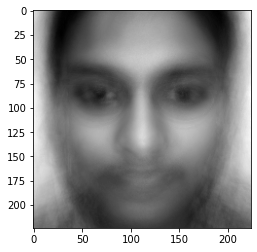

In [20]:
new = plt.imshow(np.reshape(m_meanface, (224,224)), cmap = 'gray')

In [21]:
#model_eigenvectors; these are eigenfaces
# for m, n*n images (64, 224*224),
# 1d faces, A(n^2*m), calculate mean face, subtract mean face
# covariance matrix, A.A^T , C(n^2*n^2)
# ideally there will be n^2 eigenvectors of size n^2*1, matrix  size, U, n^2*n^2...huge 50176*50176 
# to reduce this, m eigenvectors of size m*1 will be generated, 64, 64*1, matrix size, V, m*m
# using matrix properties, m largest eigenvectors are calculated, U = A(n^2*m) * V(m*m), size  n^2*m i.e. 50176*64
# these are converted to 2d...has face like appearnace....eigenface
m_eigenvectors	=	cv2.face_BasicFaceRecognizer.getEigenVectors(model)
type(m_eigenvectors), m_eigenvectors.shape, m_eigenvectors[1].shape

(numpy.ndarray, (50176, 13), (13,))

In [22]:
m_eigenvectors = m_eigenvectors.T
type(m_eigenvectors), m_eigenvectors.shape, m_eigenvectors[1].shape

(numpy.ndarray, (13, 50176), (50176,))

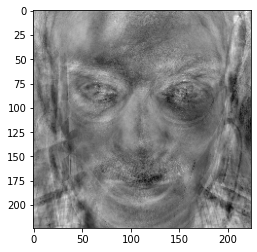

In [23]:
new = plt.imshow(np.reshape(m_eigenvectors[2], (224,224)), cmap = 'gray')
#(feature) for feature in test_data1

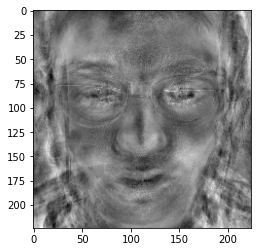

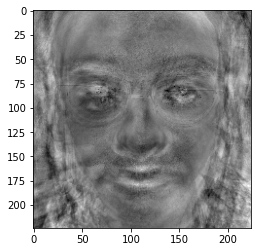

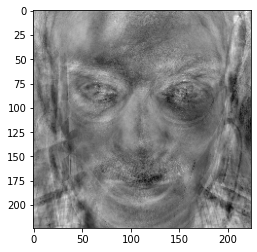

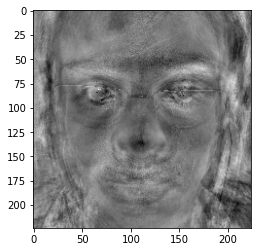

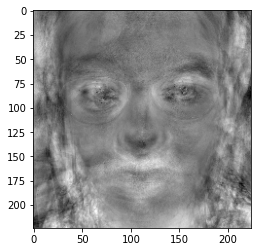

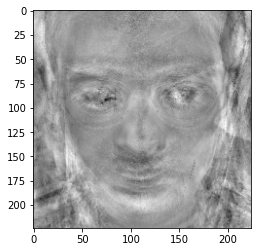

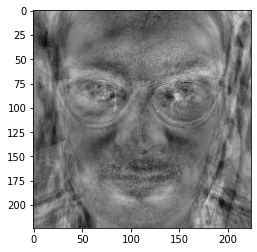

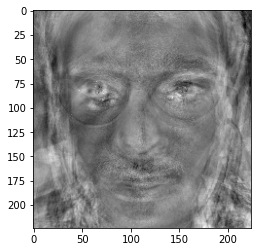

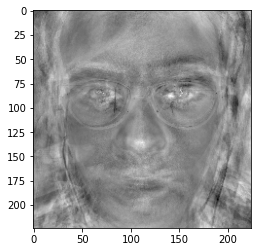

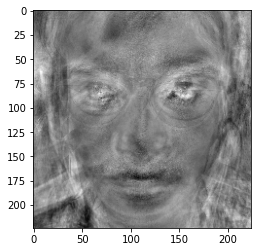

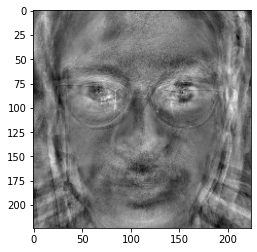

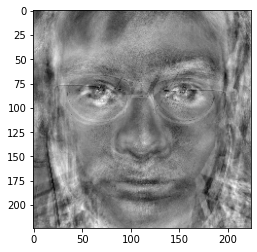

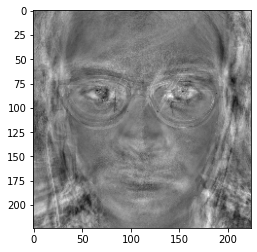

In [24]:
#new = plt.imshow(np.reshape(m_eigenface, (224,224)) for m_eigenface in m_eigenvectors)
for m_eigenface in m_eigenvectors:
  m_eigenface = np.reshape(m_eigenface, (224,224))
  plt.imshow(m_eigenface, cmap = 'gray')
  plt.show()

In [25]:
a=224*224 
b= 64*a
a,b

(50176, 3211264)

In [26]:
#model_eigenvalues
m_eigenvalues	=	cv2.face_BasicFaceRecognizer.getEigenValues(model)
type(m_eigenvalues), m_eigenvalues.size

(numpy.ndarray, 13)

In [27]:
# Number of principle components; eigenfaces
# keep 10 principal components (read Eigenfaces), then call
# the factory method like this:
# EigenFaceRecognizer::create(10);
retval	=	cv2.face_BasicFaceRecognizer.getNumComponents(model)
retval, type(retval)

(13, int)

In [28]:
#model_projections
m_projections	=	cv2.face_BasicFaceRecognizer.getProjections(model)
type(m_projections), len(m_projections),m_projections[1].size

(list, 70, 13)

In [29]:
#model_labels
m_labels	=	cv2.face_BasicFaceRecognizer.getLabels(model)
#m_labels, type(m_labels), m_labels.size

In [30]:
datagen = ImageDataGenerator(rescale=1./255)  
test_data = datagen.flow_from_directory(
    test_data_dir,  
    target_size=(img_width, img_height), 
    color_mode="grayscale",
    batch_size=1, 
    class_mode=None,  
    shuffle=False)

data_list = []
batch_index = 0

while batch_index <= test_data.batch_index:
    data = test_data.next()
    data_list.append(data[0])
    batch_index = batch_index + 1

# now, data_array is the numeric data of whole images
test_data1 = np.asarray(data_list)

nb_test_samples = len(test_data.filenames)  
num_classes = len(test_data.class_indices)
test_labels = test_data.classes
#test_labels

Found 28 images belonging to 14 classes.


In [31]:
type(test_data), len(test_data), test_data[1].shape, type(test_labels), type(np.array(test_labels)), len(test_labels)

(keras.preprocessing.image.DirectoryIterator,
 28,
 (1, 224, 224, 1),
 numpy.ndarray,
 numpy.ndarray,
 28)

In [32]:
type(test_data1), len(test_data1), test_data1.shape, type(test_labels), type(np.array(test_labels)), len(test_labels)

(numpy.ndarray, 28, (28, 224, 224, 1), numpy.ndarray, numpy.ndarray, 28)

In [33]:

#model.predict(test_data1[1])

In [34]:
# returns label and confidence value
model_predictions = [model.predict(feature) for feature in test_data1]
#model_predictions

In [35]:
# convert list to array.....model_predictions
model_predictions = np.array(model_predictions)
#model_predictions

In [36]:
# extract label from label and confidence....model_predictions
model_predictions_label = model_predictions[:,[0]]
#model_predictions_label

In [37]:
# transpose column vector to row vector .... model_predictions_label 
model_predictions_label = model_predictions_label.T
model_predictions_label

array([[ 0.,  0., 11.,  1.,  2.,  2.,  3.,  3.,  0.,  4.,  5.,  5., 10.,
         6.,  7.,  7.,  8., 10.,  9.,  9., 10., 10., 11., 11., 12., 12.,
        13., 13.]])

In [38]:
test_accuracy=100*np.sum(model_predictions_label==test_labels)/len(model_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 85.7143%
